In [9]:
import pandas as pd
import anndata
import joblib
import pybedtools
import seaborn as sns
import pyBigWig
import matplotlib.pyplot as plt
import pathlib
from ALLCools.plot import *

In [2]:
from matplotlib import rc

labelsize = 6
linewidth = 0.5
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth - 0.2)
rc('ytick.minor', width=linewidth - 0.2)

In [8]:
cell_tidy_data = pd.read_csv('./cell_5142_meta_tsne.txt', header=None, sep='\t', 
                             index_col=0, usecols=[0, 19, 20, 21, 22, 23],
                             names=['cell', 'Cluster1', 'Cluster2', 'Cluster3', 'tsne_0', 'tsne_1'])
cell_tidy_data.head()

,Cluster1,Cluster2,Cluster3,tsne_0,tsne_1
cell,,,,,
191216-CEMBA-mm-P56-CEMBA191126-9J-1-CEMBA191126-9J-2-A10_ad001,DG,Exc,DG,7.401447,-17.757222
191216-CEMBA-mm-P56-CEMBA191126-9J-1-CEMBA191126-9J-2-A10_ad007,CA3,Exc,CA,-5.805886,-18.036886
191216-CEMBA-mm-P56-CEMBA191126-9J-1-CEMBA191126-9J-2-A10_ad008,DG,Exc,DG,6.614714,-16.014062
191216-CEMBA-mm-P56-CEMBA191126-9J-1-CEMBA191126-9J-2-A11_ad001,DG,Exc,DG,20.769843,-8.314259
191216-CEMBA-mm-P56-CEMBA191126-9J-1-CEMBA191126-9J-2-A10_ad004,DG,Exc,DG,19.022316,-12.338020


In [30]:
cell_tidy_data.loc[(cell_tidy_data['Cluster3'] == 'CA') & (cell_tidy_data['Cluster1'] == 'CA3'), 'Cluster3'] = 'CA3'
cell_tidy_data.loc[(cell_tidy_data['Cluster3'] == 'CA') & (cell_tidy_data['Cluster1'] == 'CA1'), 'Cluster3'] = 'CA1'


In [33]:
special_palette = {'DG': '#c378ca',
 'CA': '#ae97ce',
 'CA1': '#5e2c96',
 'CA3': '#0049dd',
 'MG': '#aab639',
 'VLMC': '#5e461e',
 'OLF': '#812970',
 'BV': '#9bb070',
 'ODC': '#cea675',
 'ASC': '#de9f00',
 'ANP': '#d646b8',
 'OPC': '#a87331',
 'Inh': '#e93400',
 'Others': '#D3D3D3'}

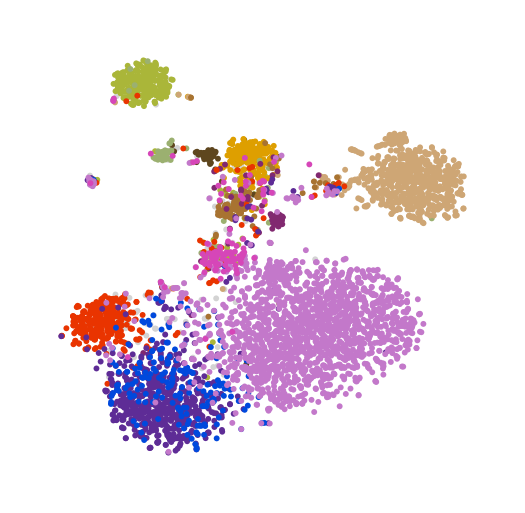

In [43]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=300)
xlim = (-32.4571309626777, 33.53421897312573)
ylim = (-36.70332544319956, 45.55666420444344)

clusters = [
    'Others', 'MG', 'VLMC', 'ASC', 'BV', 'ODC', 'OPC', 'OLF', 'Inh', 'CA1',
    'CA3', 'DG', 'ANP'
]

first = True
for cluster in clusters:
    if first:
        first = False,
        axis_format = 'tiny'
    else:
        axis_format = None

    sub_df = cell_tidy_data[cell_tidy_data['Cluster3'] == cluster]
    categorical_scatter(data=sub_df,
                        ax=ax,
                        coord_base='tsne',
                        axis_format=None,
                        hue='Cluster3',
                        s=2,
                        palette=special_palette)
ax.set(xlim=xlim, ylim=ylim)
fig.savefig('HiC_tsne.png', dpi=1200)
pass

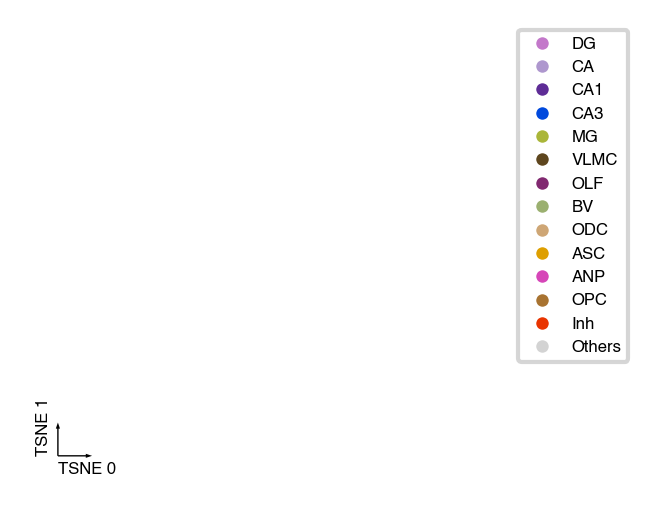

In [47]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=300)
xlim = (-32.4571309626777, 33.53421897312573)
ylim = (-36.70332544319956, 45.55666420444344)

clusters = [
    'Others', 'MG', 'VLMC', 'ASC', 'BV', 'ODC', 'OPC', 'OLF', 'Inh', 'CA1',
    'CA3', 'DG', 'ANP'
]

categorical_scatter(data=cell_tidy_data,
                    ax=ax,
                    coord_base='tsne',
                    axis_format=axis_format,
                    hue='Cluster3',
                    s=2,
                    show_legend=True,
                    palette=special_palette)
ax.set(xlim=xlim, ylim=ylim)

ax.collections[0].remove()
fig.savefig('HiC_tsne.labels.pdf')
pass

In [48]:
cell_tidy_data.shape

(5142, 5)